<a href="https://colab.research.google.com/github/gracjans/GSN/blob/main/Gracjan_Strzelec_239580_GSN_1_zima_2021_22_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GSN 1 - Winter 2021/22 
Homework check and self study

### Task 1
- Using the code prepared during homework perform a "forward pass" through your networks using syntetic data created in previous classes

- What operations (if any) do you have to perform on input data to be able to do this operation. 



#### Load dataset and neural network code prepared during homework

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
X = np.load('drive/MyDrive/lab2-dataset/X.npy')
y = np.load('drive/MyDrive/lab2-dataset/y.npy')
bb = np.load('drive/MyDrive/lab2-dataset/bb.npy')

In [3]:
class myLayer:
    def __init__(self, neuron_count, inputs_count, activation, weights=None, biases=None):
        self.neuron_count = neuron_count
        self.inputs_count = inputs_count
        self.activation = activation

        # check if weights or biases are passed as an network argument, otherwise initialize it with random values
        if weights is not None and biases is not None:
            self.weights, self.biases = np.array(weights), np.array(biases)

        elif weights is not None:
            self.weights = np.array(weights)
            self.biases = self.initialize_random(self.neuron_count, self.inputs_count)[1]

        elif biases is not None:
            self.biases = np.array(biases)
            self.weights = self.initialize_random(self.neuron_count, self.inputs_count)[0]

        else:
            self.weights, self.biases = self.initialize_random(self.neuron_count, self.inputs_count)

    @staticmethod
    def initialize_random(neuron_count, inputs_count):
        weights = 0.1 * np.random.rand(neuron_count, inputs_count)
        biases = 0.01 * np.random.rand(neuron_count)
        return weights, biases

    def forward(self, inputs):
        z = np.dot(inputs, self.weights.T) + self.biases
        return self.activation(z)

In [4]:
class myNetwork:
    """
    myNetwork class parameters:
        layers_count: int (number of layers in neural network),
        neurons_count: tuple of ints (tuple with number of neurons in each layer)
            (lenght should correspond to number of layers defined in previous parameter)
        inputs_count: int (number of inputs to each neuron of input layer)
        activation: function (one of activation function from above)
        weights: OPTIONAL - tuple of arrays (arrays of weights for each of layer)
        biases: OPTIONAL - tuple of arrays (arrays of biases for each of layer)
    """
    def __init__(self, layers_count, neurons_count, inputs_count, activation, weights=None, biases=None):
        self.layers_instances = []

        # initialize layer class instances
        for layer_id in range(layers_count):
            layer_weights = weights[layer_id] if weights is not None else None
            layer_biases = biases[layer_id] if biases is not None else None
            if layer_id == 0:
                self.layers_instances.append(myLayer(neurons_count[layer_id], inputs_count, activation, layer_weights, layer_biases))
            else:
                prevous_layer_inputs_count = self.layers_instances[layer_id-1].weights.shape
                self.layers_instances.append(myLayer(neurons_count[layer_id], prevous_layer_inputs_count[0], activation, layer_weights, layer_biases))
        
        # do validation of shapes
        self.validate_weights_shape(self.layers_instances) 

    @staticmethod
    def validate_weights_shape(layers):
        for i in range(len(layers)-1):
          assert layers[i].weights.shape[0] == layers[i+1].weights.shape[1]

    def forward(self, inputs):
        current_state = np.array(inputs)
        for layer in self.layers_instances:
          current_state = layer.forward(current_state)
        return np.exp(current_state) / np.sum(np.exp(current_state))

In [5]:
# ACTIVATION FUNCTIONS 
def linear(x):
    return x

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def relu(x):
    return x * (x > 0)

def tanh(X):
    return (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

#### initialize neural network and perform a forward pass

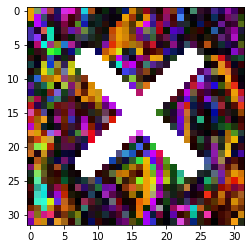

In [6]:
plt.imshow(X[533])

In [22]:
# initialize NN with 3 layers (size of layers: 3,4,3), 32*32*3 inputs, sigmoid activation function and random weights/biases from range 0-1
myNetwork1 = myNetwork(3, (3, 4, 3), 32*32*3, sigmoid)

In [35]:
# prepare input data (resize samples to 1D array)

# prepare single sample
single_sample = X[100].reshape(32*32*3,)

# prepare batch of data with 32 samples
batch_32 = np.array([X[i].reshape(32*32*3,) for i in range(32)])

# prepare batch of every sample
batch_alldata = np.array([X[i].reshape(32*32*3,) for i in range(len(X))])

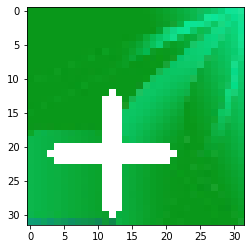

In [36]:
# we can reshape sample again to restore the image
plt.imshow(single_sample.reshape(32,32,3))

In [37]:
# perform forward pass on single samples
myNetwork1.forward(single_sample)

array([0.33226842, 0.33084858, 0.33688301])

In [38]:
# perform forward pass on batch with every sample
myNetwork1.forward(batch_alldata)

array([[0.00036837, 0.00036679, 0.00037348],
       [0.00036837, 0.00036679, 0.00037348],
       [0.00036837, 0.00036679, 0.00037348],
       ...,
       [0.00036837, 0.00036679, 0.00037348],
       [0.00036837, 0.00036679, 0.00037348],
       [0.00036837, 0.00036679, 0.00037348]])

To perform forward pass, I had to transform every input to 1D array using .reshape method.

## Task 2

Using previous knowledge answer following questions:
- What is a classification task? What does it mean, that an entity belongs to a "class"

- Try to propose a method (methods) for calculating "error" in defining affiliation of the input data to a specific class. Is it necessary to transform the labels 

- How would you describe the "probability" of input data belonging to a class (using the network output). 





---


Classification is the process of predicting the class of given sample. 

If there is 'x' symbol written on the image, that sample belongs to class 'x'. Class in this context is used to describe the sample.

Classificator should recognize the symbol on the given image and then should return apropriate output.



---

In our case (clasificating the symbol on the given image) i think most apropriate method for calculating the 'error' will be Categorical Crossentropy (also called Softmax Loss).

It is necessary to transform the labels using one-hot encoding before calculating the error (change the labels froms strings to the 1D vectors with 3 records, where one of them is '1', rest is '0').



---

On the output of neural network we got 1D array with number of values corresponding to number of neurons in the output layer. 
Each value represents propability of belonging the input data to the class. It shows us, what are the model predictions, and 'how sure' it is about it's predictions.

## Task 3

- Is it possible (using your current knowledge) to modify the weights in the network to perform the classification task "better"? How would you do it?

One of the ideas for choosing better initial weights, would be to use weights from another, previously trained model. The model, that has solved a similar problem before.